/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


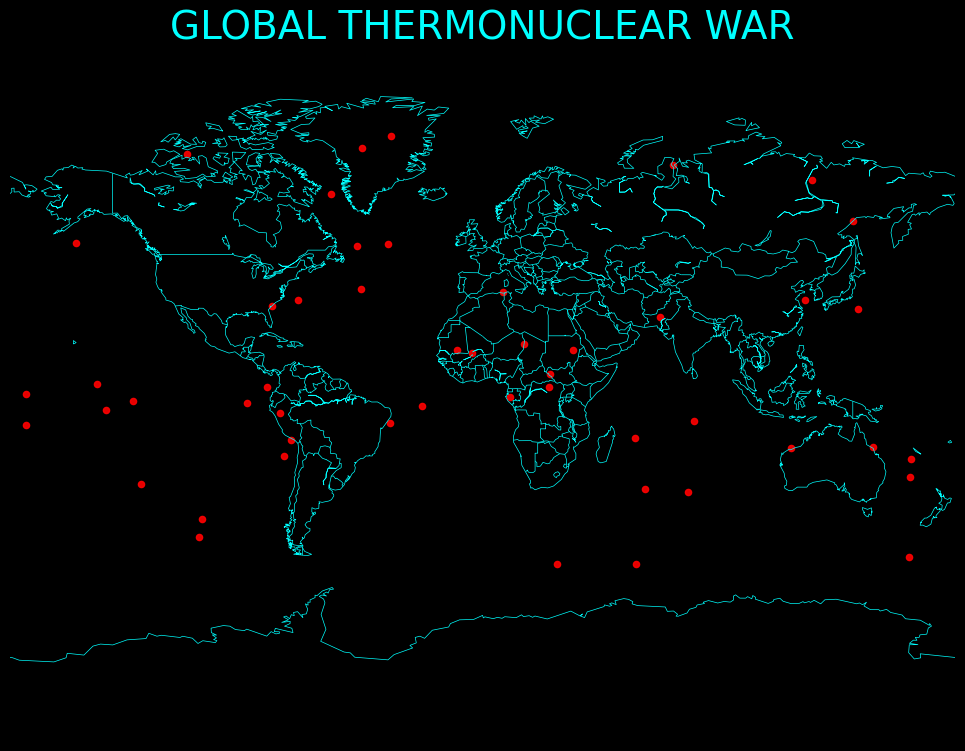

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import random
from matplotlib.animation import FuncAnimation

# Set up the figure with a dark background
fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Create a Basemap instance for a global map
m = Basemap(projection='mill', lon_0=0)

# Draw coastlines and countries with neon-style lines
m.drawcoastlines(color='cyan', linewidth=0.5)
m.drawcountries(color='cyan', linewidth=0.5)
m.drawmapboundary(fill_color='black')

# Generate random strategic points
def generate_points(num_points):
    latitudes = np.random.uniform(-60, 80, num_points)
    longitudes = np.random.uniform(-180, 180, num_points)
    return list(zip(longitudes, latitudes))

points = generate_points(50)

# Plot strategic points
def plot_points(points):
    for lon, lat in points:
        x, y = m(lon, lat)
        plt.scatter(x, y, color='red', s=20, alpha=0.9)

# Draw missile trajectory arcs
def draw_arc(lon1, lat1, lon2, lat2):
    arc_lons = np.linspace(lon1, lon2, 100)
    arc_lats = np.sin(np.linspace(0, np.pi, 100)) * 20 + np.linspace(lat1, lat2, 100)
    x, y = m(arc_lons, arc_lats)
    plt.plot(x, y, linestyle='--', color='white', linewidth=1)

# Animation function
def update(frame):
    lon1, lat1 = random.choice(points)
    lon2, lat2 = random.choice(points)
    draw_arc(lon1, lat1, lon2, lat2)
    return []

# Plot static elements
plot_points(points)

# Animate missile trajectories
ani = FuncAnimation(fig, update, frames=100, interval=100, blit=False)
plt.title("GLOBAL THERMONUCLEAR WAR", color='cyan', fontsize=28)
plt.axis('off')
plt.show()
